# Put all data into dictionary

## try and error

In [28]:
import pandas as pd
import os

In [36]:
folder = 'C:/Users/Iris King/Desktop/MSc_FYP/original_reports/2013/'
files = os.listdir(folder)

file = files[1]
with open(folder+file, 'r',encoding='gb18030',errors='ignore') as f:
    try:
        text = f.read() 
        header = text.split('\n')
        if len(header)<19:
            pass
        else: 
            print(text)
    except Exception as e:
        print(e)
        print(file)

In [1]:
# header

In [35]:
header[0].split(' Date')[1].replace(': ','')

'Jan 23 2013  7:41:39'

In [44]:
# header[-8].replace('-0- ','').replace(' GMT','')
header[-8].split()[-1]

'GMT'

## Define the function

In [2]:
def parse_text(file):

    out_dict = {}
    with open(folder+file, 'r',encoding='gb18030',errors='ignore') as f:
  
            text = f.read() 
            header = text.split('\n') # split text
            title = header[1]# get title
            length = len(header) # get length
            source = header[0].split(' Date')[0].replace('Wire: ','') # get source
            
            if '[Delayed]' in title: # check if delayed
                if '-0-'in header[-10]:
                    date = header[-10].split('-0- ')[1].replace(' GMT','')# get date
#                     content = " ".join(str(x) for x in header[2:-10])
                else:
                    date = header[0].split(' Date')[1].replace(': ','')
#                     content = " ".join(str(x) for x in header[2:-8])
            else:
                if '-0-'in header[-8]:
                    date = header[-8].split('-0- ')[1].replace(' GMT','')# get date
#                     content = " ".join(str(x) for x in header[2:-8])
                else:
                    date = header[0].split(' Date')[1].replace(': ','')
#                     content = " ".join(str(x) for x in header[2:-7])
                    
            
           
            for i in range(5):
                if "This story was delayed " in header[i]:
                    start_place = i
                else:
                    start_place = 2
            
            
            
            if "Contributed via: Bloomberg Publisher WEB Service" in header:
                place = header.index("Contributed via: Bloomberg Publisher WEB Service")
                content = " ".join(str(x) for x in header[start_place:place])
            else:
                for sentence in header:
                    if "Provider ID" in sentence:
                        place = header.index(sentence)
                        content = " ".join(str(x) for x in header[start_place:place])
                    else:
                        if '[Delayed]' in title:
                            if '-0-'in header[-10]:
                                content = " ".join(str(x) for x in header[start_place:-10])
                            else:
                                content = " ".join(str(x) for x in header[start_place:-8])
                        else:
                            if '-0-'in header[-8]:
                                content = " ".join(str(x) for x in header[start_place:-8])
                            else:
                                content = " ".join(str(x) for x in header[start_place:-7])
                    
    
            out_dict['title'] = title
            out_dict['source'] = source
            out_dict['date'] = date
            out_dict['length'] = length
            out_dict['content'] = content
            

            
    return out_dict

## handle the data
### 2013

In [2]:
folder = 'C:/Users/Iris King/Desktop/MSc_FYP/original_reports/2013/'
files = os.listdir(folder)

files_dict_2013={}

for file in files:
    files_dict_2013[file]=parse_text(file)

### 2014

In [3]:
folder = 'C:/Users/Iris King/Desktop/MSc_FYP/original_reports/2014/'
files = os.listdir(folder)

files_dict_2014={}

for file in files:
    files_dict_2014[file]=parse_text(file)
# files_dict_2014

### 2015

In [4]:
folder = 'C:/Users/Iris King/Desktop/MSc_FYP/original_reports/2015/'
files = os.listdir(folder)

files_dict_2015={}

for file in files:
    files_dict_2015[file]=parse_text(file)
# files_dict_2015

### 2016

In [5]:
folder = 'C:/Users/Iris King/Desktop/MSc_FYP/original_reports/2016/'
files = os.listdir(folder)

files_dict_2016={}

for file in files:
    files_dict_2016[file]=parse_text(file)
# files_dict_2016

### 2017

In [6]:
folder = 'C:/Users/Iris King/Desktop/MSc_FYP/original_reports/2017/'
files = os.listdir(folder)

files_dict_2017={}

for file in files:
    files_dict_2017[file]=parse_text(file)
# files_dict_2017

### 2018

In [9]:
folder = 'C:/Users/Iris King/Desktop/MSc_FYP/original_reports/2018/'
files = os.listdir(folder)

files_dict_2018={}

for file in files:
    files_dict_2018[file]=parse_text(file)
# files_dict_2018

# Convert to dataframe

## try and error

In [ ]:
# files_dict_2013.keys()

newDF = pd.DataFrame(columns=['title','source','date','length'])
key = files_dict_2013['20130101_microsec-capital_microsec---commodity-daily-report--1st-j.txt']
# pd.DataFrame(key, columns=['title', 'source','date','length'])
df_2013 = pd.DataFrame([key])

key = files_dict_2013['20130102_dani-shares---stocks_dani-shares---stocks-pvt-ltd--commodity-.txt']
df = pd.DataFrame([key])

newDF = pd.merge(df_2013, newDF, how='outer')
newDF = pd.merge(df, newDF, how='outer')
newDF

In [ ]:
df_2013 = pd.DataFrame(columns=['title','source','date','length'])
for name in files_dict_2013.keys():
    key = files_dict_2013[name]
    new = pd.DataFrame([key])
    df_2013 = pd.merge(df_2013, new, how='outer')

## 2013-2018 dataframe

In [9]:
#2013
df_2013 = pd.DataFrame(columns=['title','source','date','length','content'])
for name in files_dict_2013.keys():
    key = files_dict_2013[name]
    new = pd.DataFrame([key])
    df_2013 = pd.merge(df_2013, new, how='outer')
    
#2014
df_2014 = pd.DataFrame(columns=['title', 'source','date','length','content'])
for name in files_dict_2014.keys():
    key = files_dict_2014[name]
    new = pd.DataFrame([key])
    df_2014 = pd.merge(df_2014, new, how='outer')
    
#2015
df_2015 = pd.DataFrame(columns=['title', 'source','date','length','content'])
for name in files_dict_2015.keys():
    key = files_dict_2015[name]
    new = pd.DataFrame([key])
    df_2015 = pd.merge(df_2015, new, how='outer')
    
#2016
df_2016 = pd.DataFrame(columns=['title', 'source','date','length','content'])
for name in files_dict_2016.keys():
    key = files_dict_2016[name]
    new = pd.DataFrame([key])
    df_2016 = pd.merge(df_2016, new, how='outer')

#2017
df_2017 = pd.DataFrame(columns=['title', 'source','date','length','content'])
for name in files_dict_2017.keys():
    key = files_dict_2017[name]
    new = pd.DataFrame([key])
    df_2017 = pd.merge(df_2017, new, how='outer')
    
#2018
df_2018 = pd.DataFrame(columns=['title', 'source','date','length','content'])
for name in files_dict_2018.keys():
    key = files_dict_2018[name]
    new = pd.DataFrame([key])
    df_2018 = pd.merge(df_2018, new, how='outer')

In [10]:
df_14 =  pd.merge(df_2013,df_2014,how='outer')
df_15 =  pd.merge(df_14,df_2015,how='outer')
df_16 =  pd.merge(df_15,df_2016,how='outer')
df_17 =  pd.merge(df_16,df_2017,how='outer')
df = pd.merge(df_17,df_2018,how='outer')
          
df.to_pickle('all_reports.pkl')

# Overview the data
## sort the data

In [1]:
import pandas as pd
df = pd.read_pickle('all_reports.pkl')

In [2]:
df.shape

(7343, 5)

In [2]:
df['date'] = pd.to_datetime(df['date'], errors='coerce') #convert to date
sorted_df = df.sort_values('date') # sort by date

In [10]:
# sorted_df

## extract year date

In [3]:
sorted_df['Date'] = sorted_df['date'].dt.date

In [11]:
# sorted_df.head()

# plots

## number of words

In [4]:
sorted_df['word_count'] = sorted_df['content'].apply(lambda x: len(str(x).split(" ")))

In [8]:
sorted_df['real_empty'] = (sorted_df['word_count']<= 13).replace({False:'full', True:'empty'})

In [12]:
# sorted_df.groupby('word_count').size().head(100)

In [3]:
from cqcplot import *
%matplotlib inline

In [6]:
mask = sorted_df['word_count'] > 13
plot_length = sorted_df.loc[mask,:]

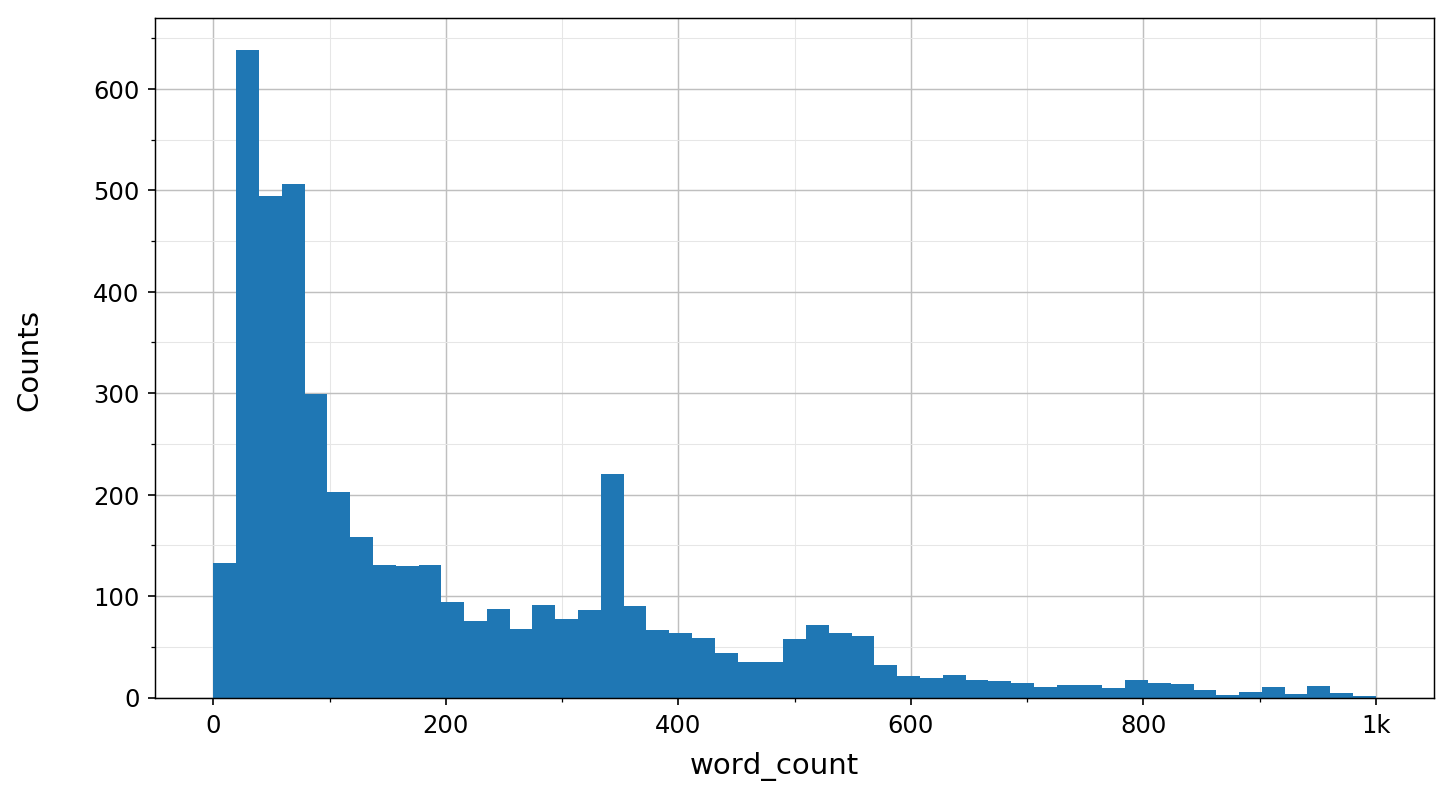

In [12]:
mask = sorted_df['word_count'] > 13
plot_length = sorted_df.loc[mask,:]
p=hist_plot(plot_length, x='word_count', var_range=[0,1000],bins=51)#, y='1',bars_orientation='horizontal',figsize=(6, 4),fontsize=8)

In [8]:
plot_length[['word_count']].quantile([0.1,0.5,0.7,0.75,0.8,0.9,0.95,0.99])

,word_count
0.10,33.00
0.50,201.00
0.70,471.00
0.75,566.25
0.80,1051.00
0.90,5315.10
0.95,7299.20
0.99,14275.04


In [52]:
plot_length.dtypes

content                  object
date             datetime64[ns]
length                    int64
source                   object
title                    object
Date                     object
word_count                int64
real_empty               object
new_source               object
check_delayed            object
dtype: object

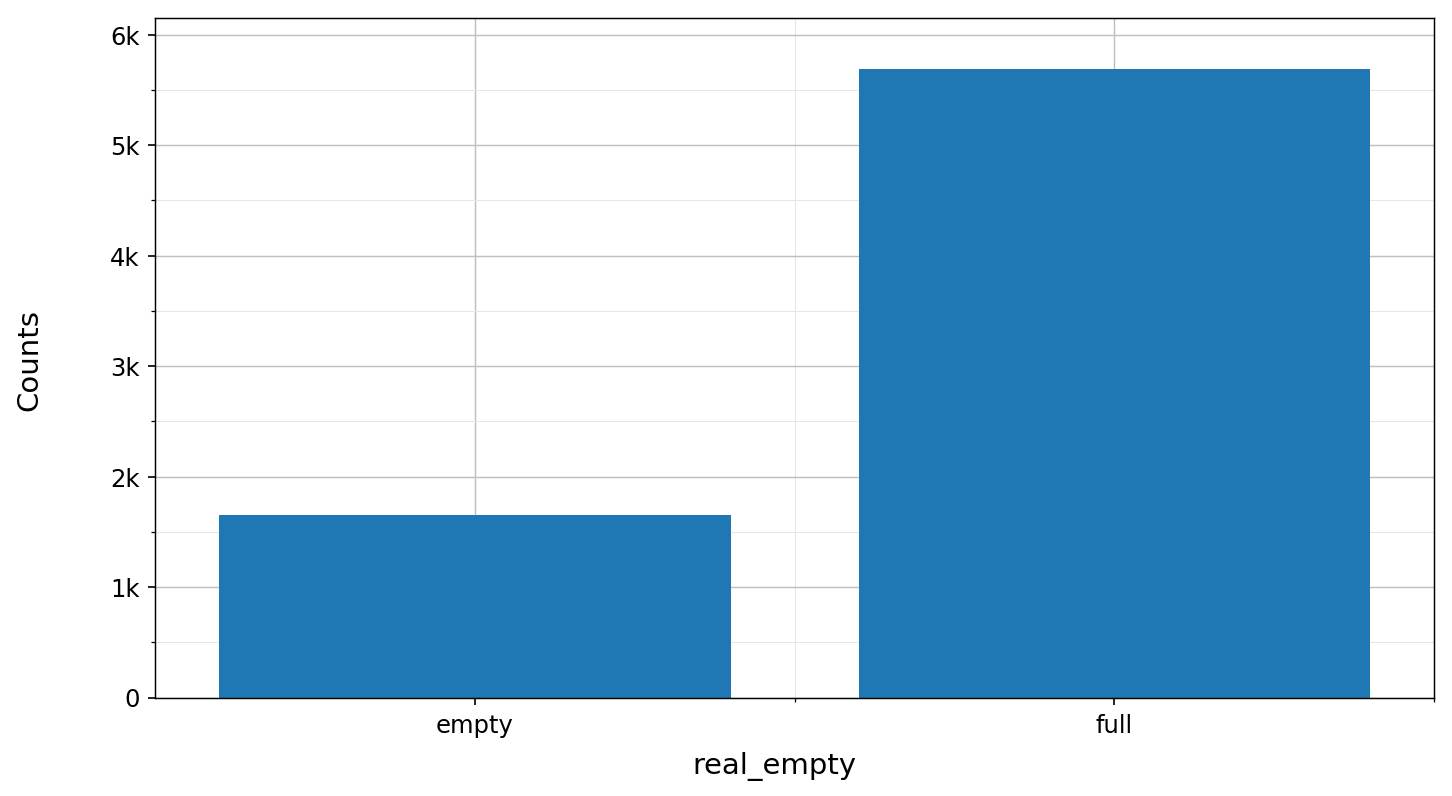

In [13]:
p=bar_plot(sorted_df, 'real_empty', '1',ylab = 'Counts')

## sources

In [13]:
source = sorted_df.groupby('source').size().to_frame('counts').reset_index()
# source

In [14]:
import numpy as np
source_lut = source.copy()
source_lut['new_source'] = np.where(source_lut['counts']>5,source_lut['source'],'others')
source_lut.drop('counts', axis=1, inplace=True)
# source_lut

### update the sorted_df

In [15]:
sorted_df = pd.merge(sorted_df, source_lut,how='left', on='source')
# sorted_df

In [16]:
mask = source['counts'] <= 5
filter_source = source.loc[mask,:]
filter_source['source'] = 'others'
plot_source = filter_source.groupby('source')[['counts']].sum().reset_index()
# plot_source
plot_source = pd.merge(plot_source,source.loc[~mask,:],how='outer').\
                sort_values('counts')
# plot_source

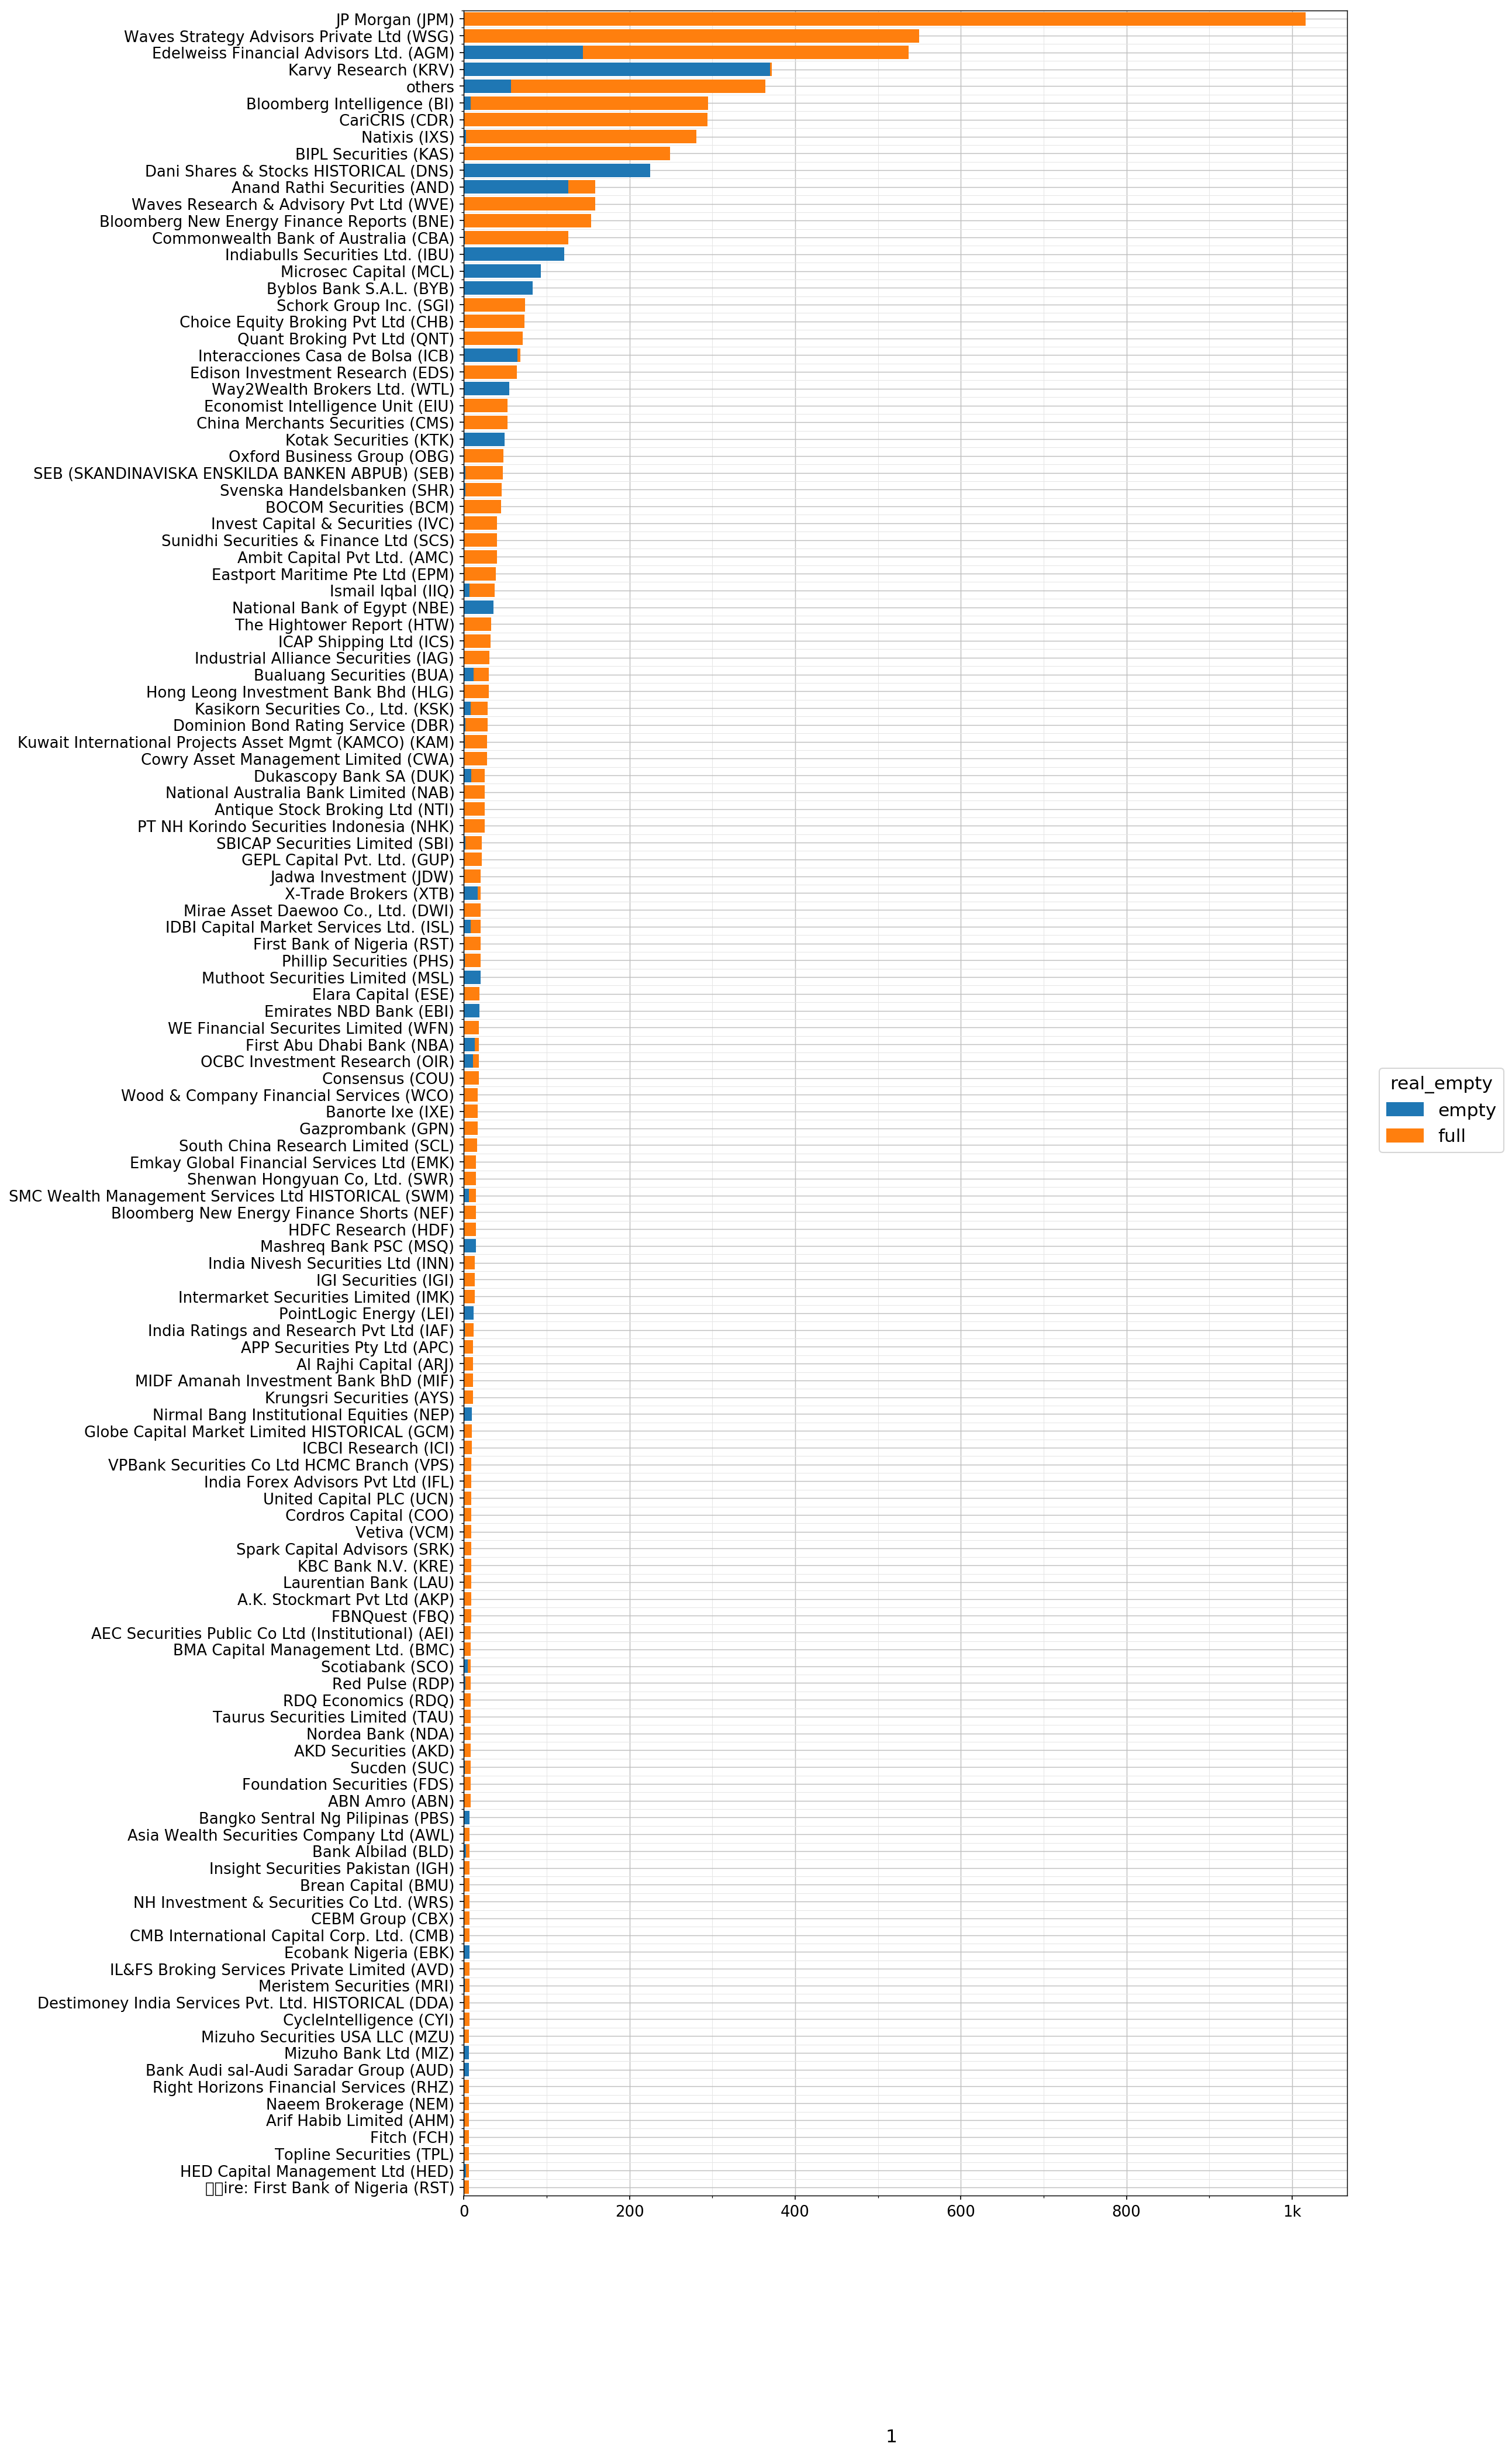

In [25]:
# p=bar_plot(sorted_2013, x='source', y='1', bars_orientation='horizontal', figsize=(11, 13), fontsize=7)
p=bar_plot(sorted_df, x='new_source', y='1',ylab = None,bars_orientation='horizontal',group='real_empty',
           order_dict={'x':plot_source['source'].tolist()},figsize=(13, 33),fontsize=15, xlab='')

## Time series of reports
### time series

In [1]:
import pandas as pd

In [4]:
sorted_df = pd.read_pickle('sorted_all_reports.pkl')

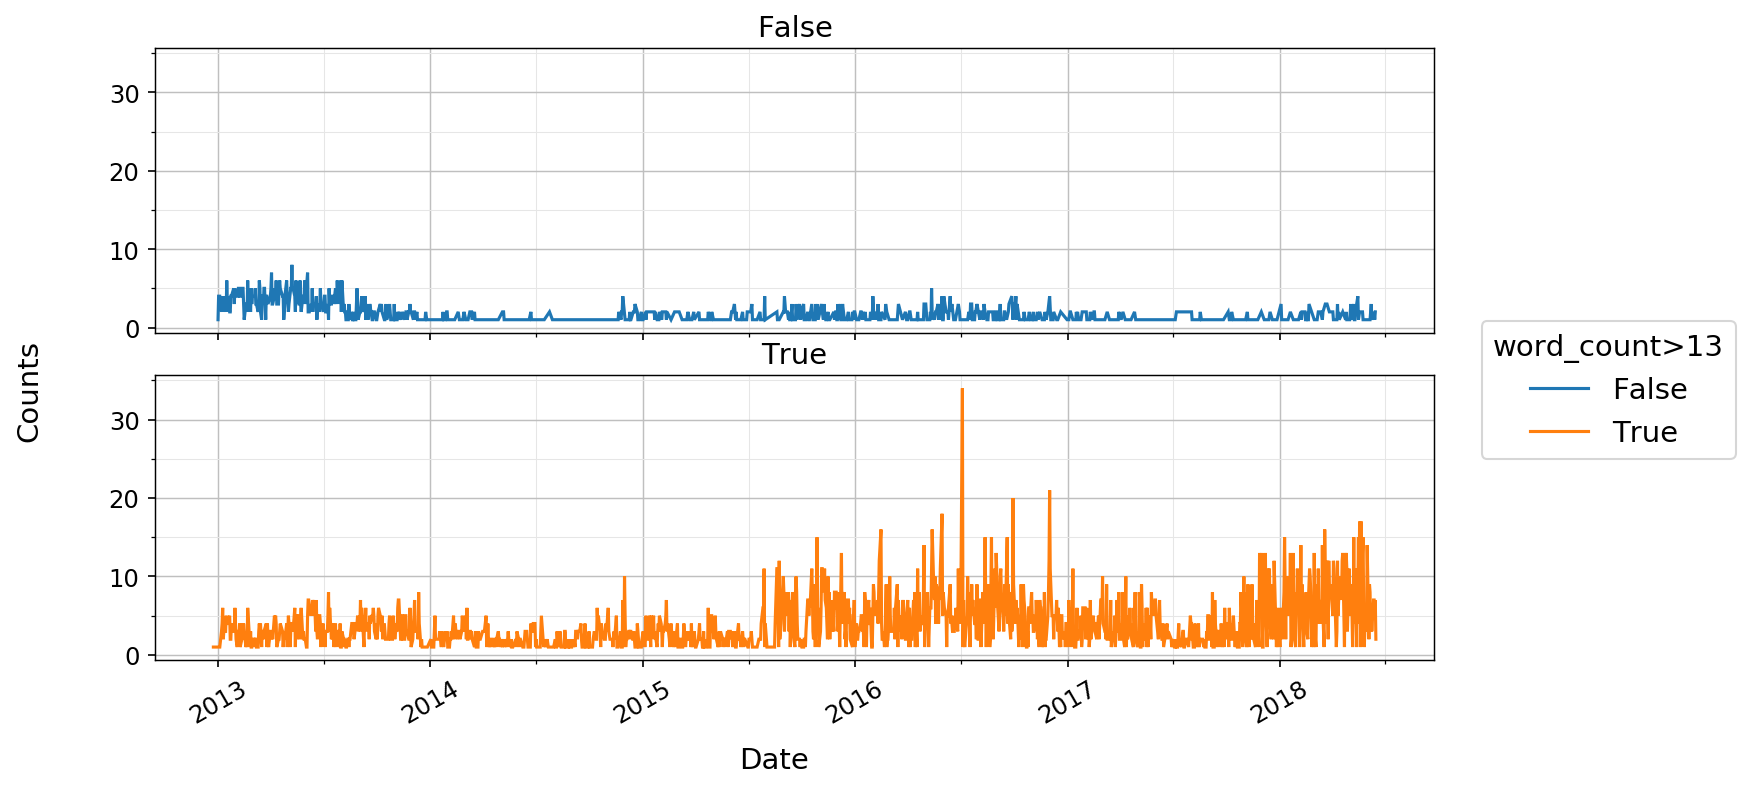

In [9]:
from cqcplot import *
%matplotlib inline
p=line_plot(sorted_df, x='Date',y = '1',ylab = 'Counts', group='word_count>13', facet_x='word_count>13', ncols=1, sharey=True)
# ncols is the number of column
# sharey means whether the y-axis is the same scale

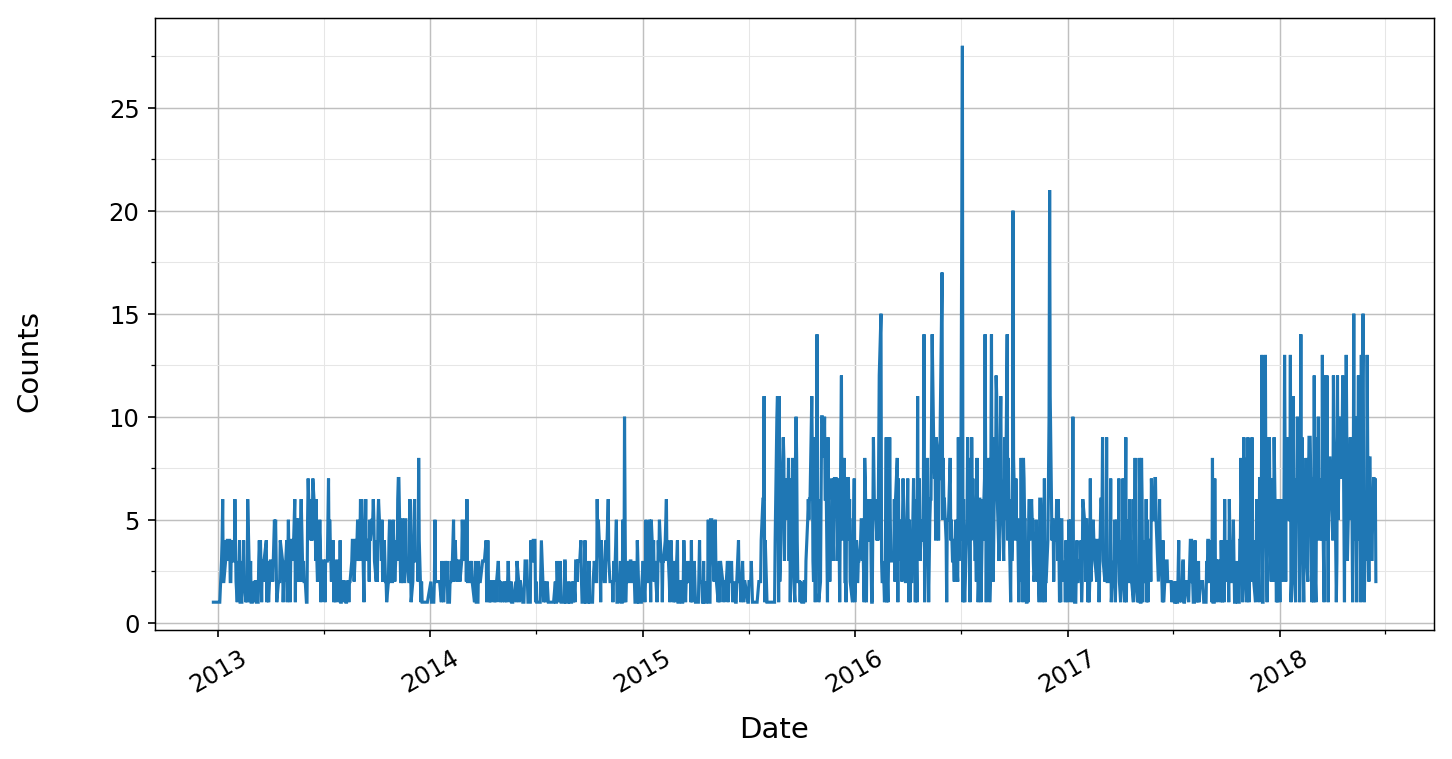

In [14]:
p=line_plot(mask, x='Date',y = '1',ylab = 'Counts')

### week of day

In [5]:
import pandas as pd
sorted_df = pd.read_pickle('sorted_all_reports.pkl')

In [19]:
sorted_df['dow'] = sorted_df['date'].dt.weekday.astype(str)

In [16]:
mask['dow'] = mask['date'].dt.weekday.astype(str)

In [6]:
mask = sorted_df.query('word_count> 13')

In [17]:
# mask

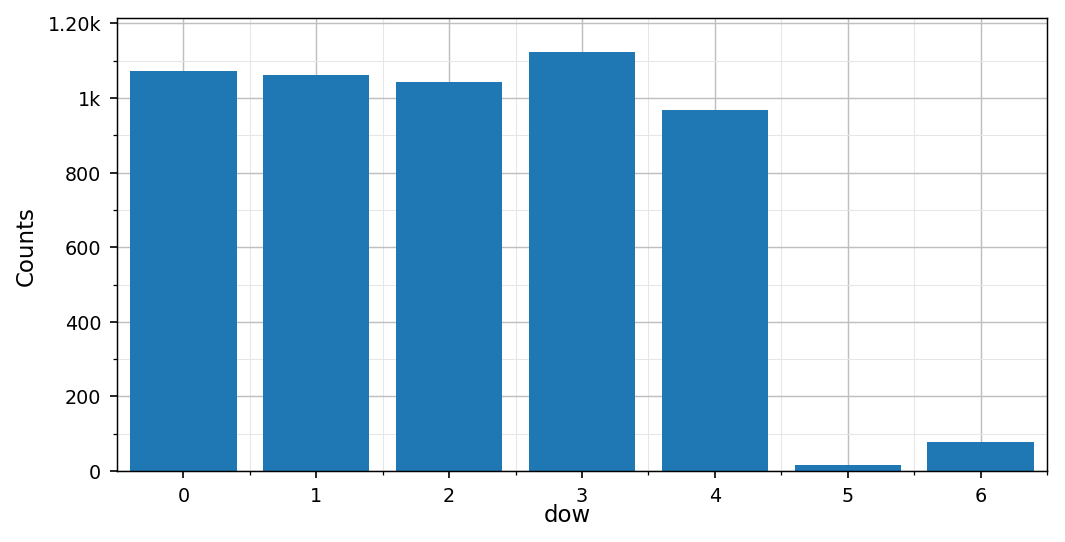

In [17]:
p = bar_plot(mask, x = 'dow', y = '1',ylab = 'Counts', figsize = (8,4),fontsize = 11)

### year

In [18]:
mask['year'] = mask['date'].dt.year

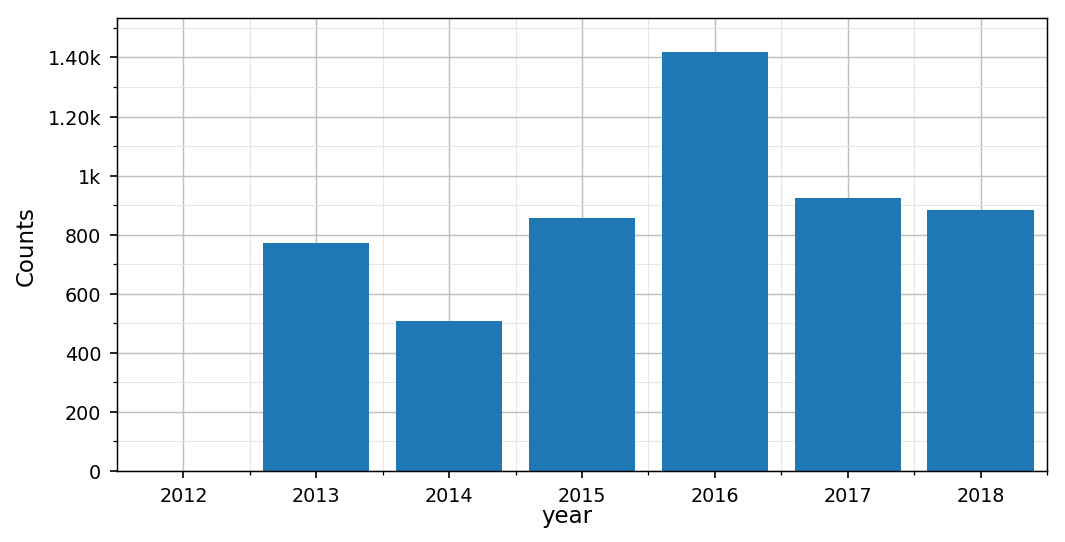

In [19]:
p = bar_plot(mask, x = 'year', y = '1',ylab = 'Counts', figsize = (8,4),fontsize = 11)

In [11]:
mask.shape

(5688, 10)

In [12]:
mask = mask.drop_duplicates('date', keep='first').\
                                                reset_index().\
                                                drop('index',axis = 1)

In [13]:
mask.shape

(5363, 10)

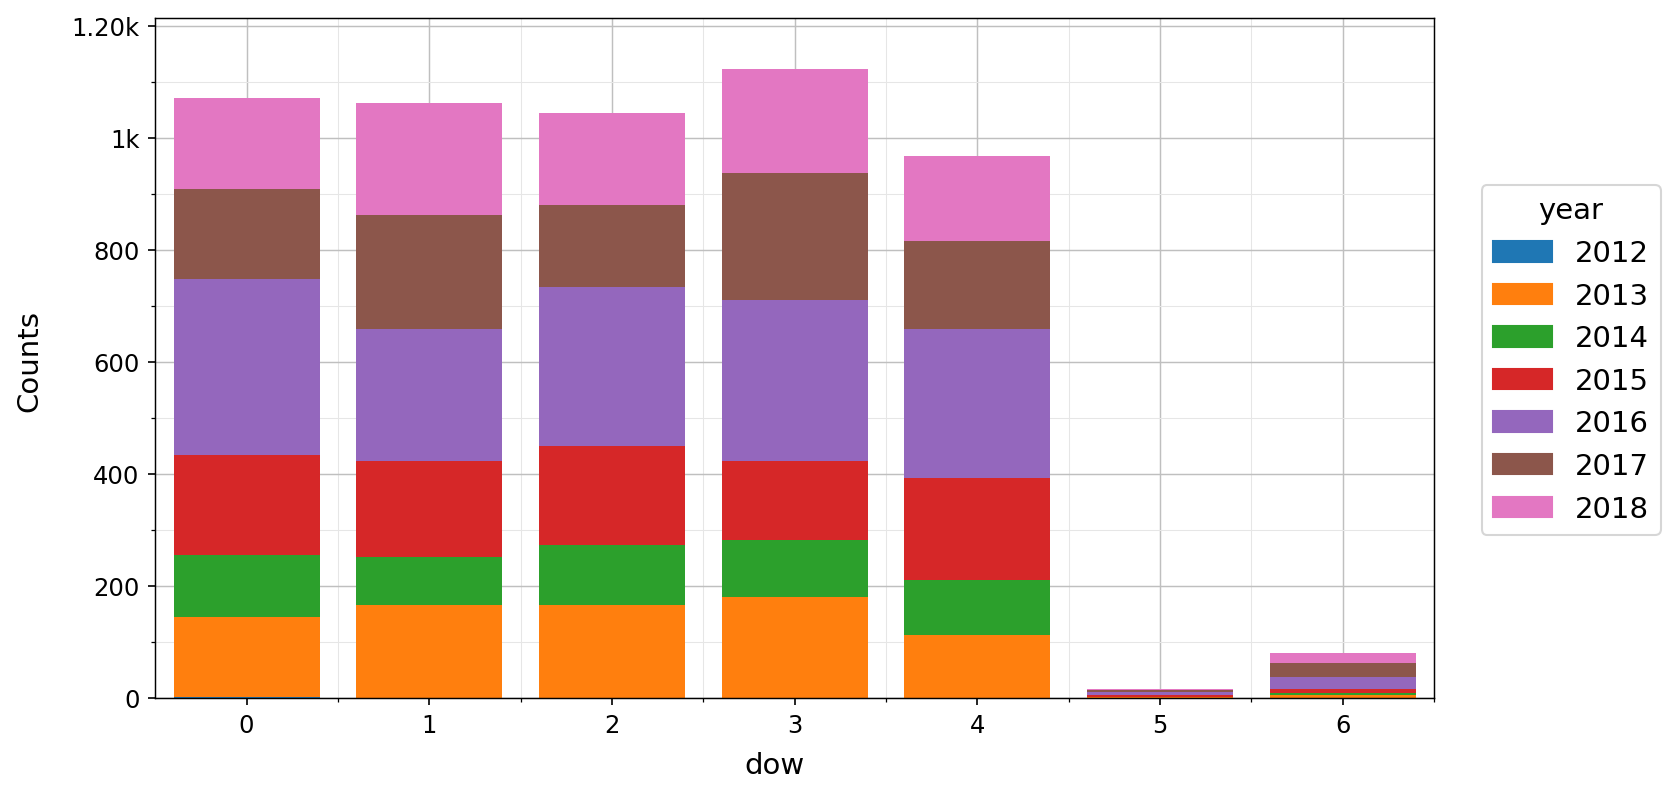

In [20]:
p=bar_plot(mask, x='dow', y='1',fontsize = 14,ylab = 'Counts',group='year')

### time

In [21]:
mask['hour'] = mask['date'].dt.hour

In [22]:
mask['hour'] = mask['hour'].astype(str)

In [18]:
# mask.head()

In [23]:
mask['hour'] = mask['hour'].astype(str)

In [24]:
order_h=[str(i) for i in range(24)]

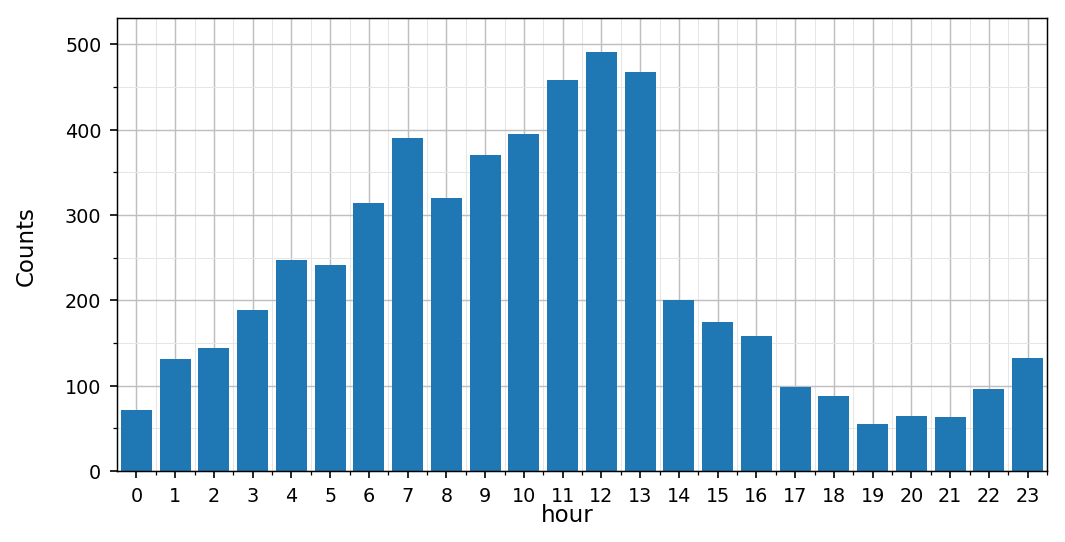

In [25]:
p = bar_plot(mask, x = 'hour', y = '1',fontsize = 11,ylab = 'Counts',order_dict={'x':order_h},figsize = (8,4))

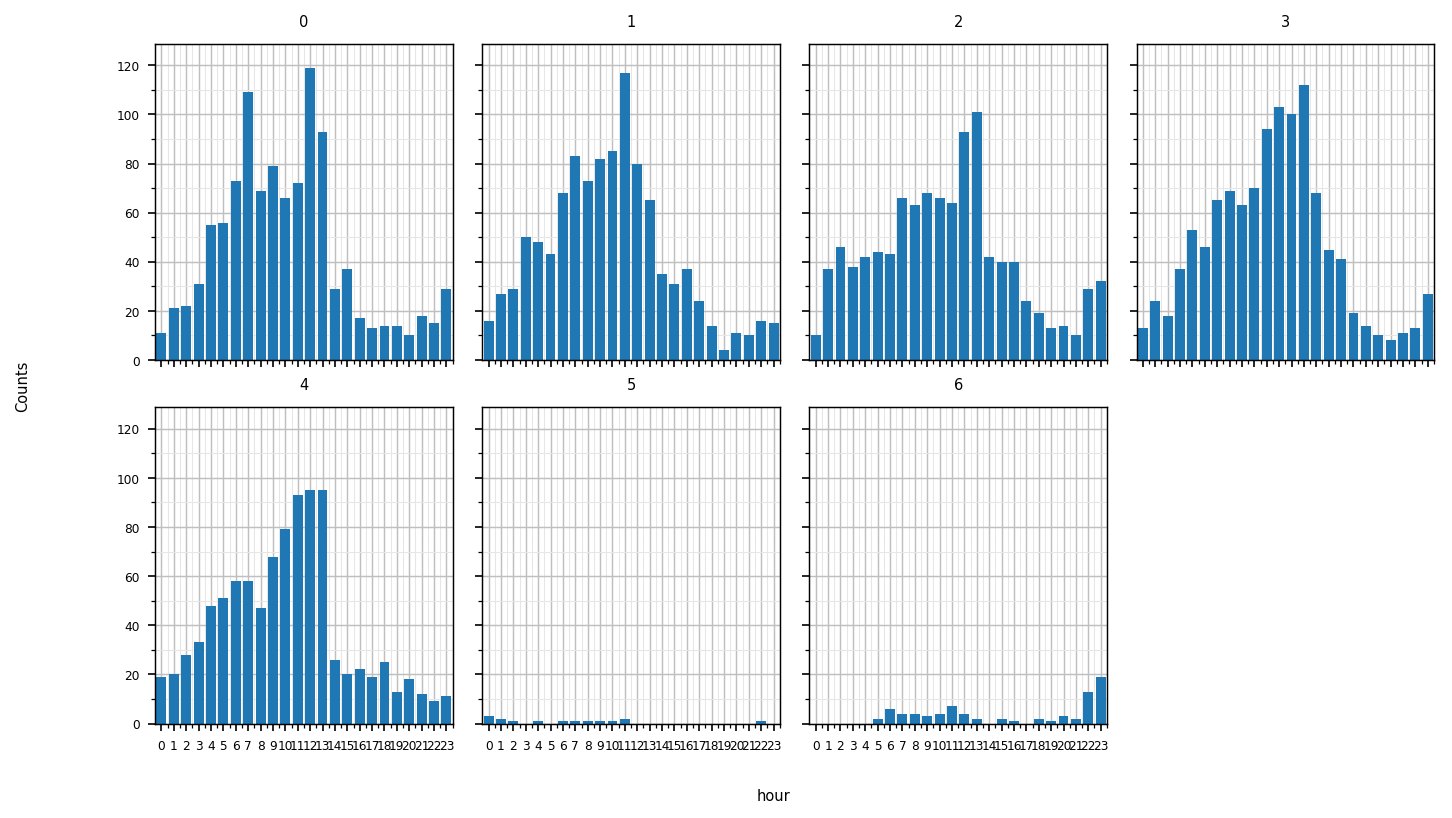

In [26]:
p=bar_plot(mask, x='hour', y='1',ylab = 'Counts',facet_x='dow',order_dict={'x':order_h}, fontsize=7)

## delayed vs non-delayed
### judge delayed

In [41]:
dic = {}
titles = sorted_df['title'].tolist()
for title in titles:
    if '[Delayed]' in title:
        dic[title] = 'True'
    else:
        dic[title] = 'False'

In [42]:
check_delayed = pd.DataFrame(list(dic.items()),columns=['title','check_delayed'])

### update the sorted_df

In [19]:
sorted_df = pd.merge(sorted_df, check_delayed,how='left', on='title')
# sorted_df

### histogram

In [1]:
import pandas as pd
sorted_df = pd.read_pickle('sorted_all_reports.pkl')

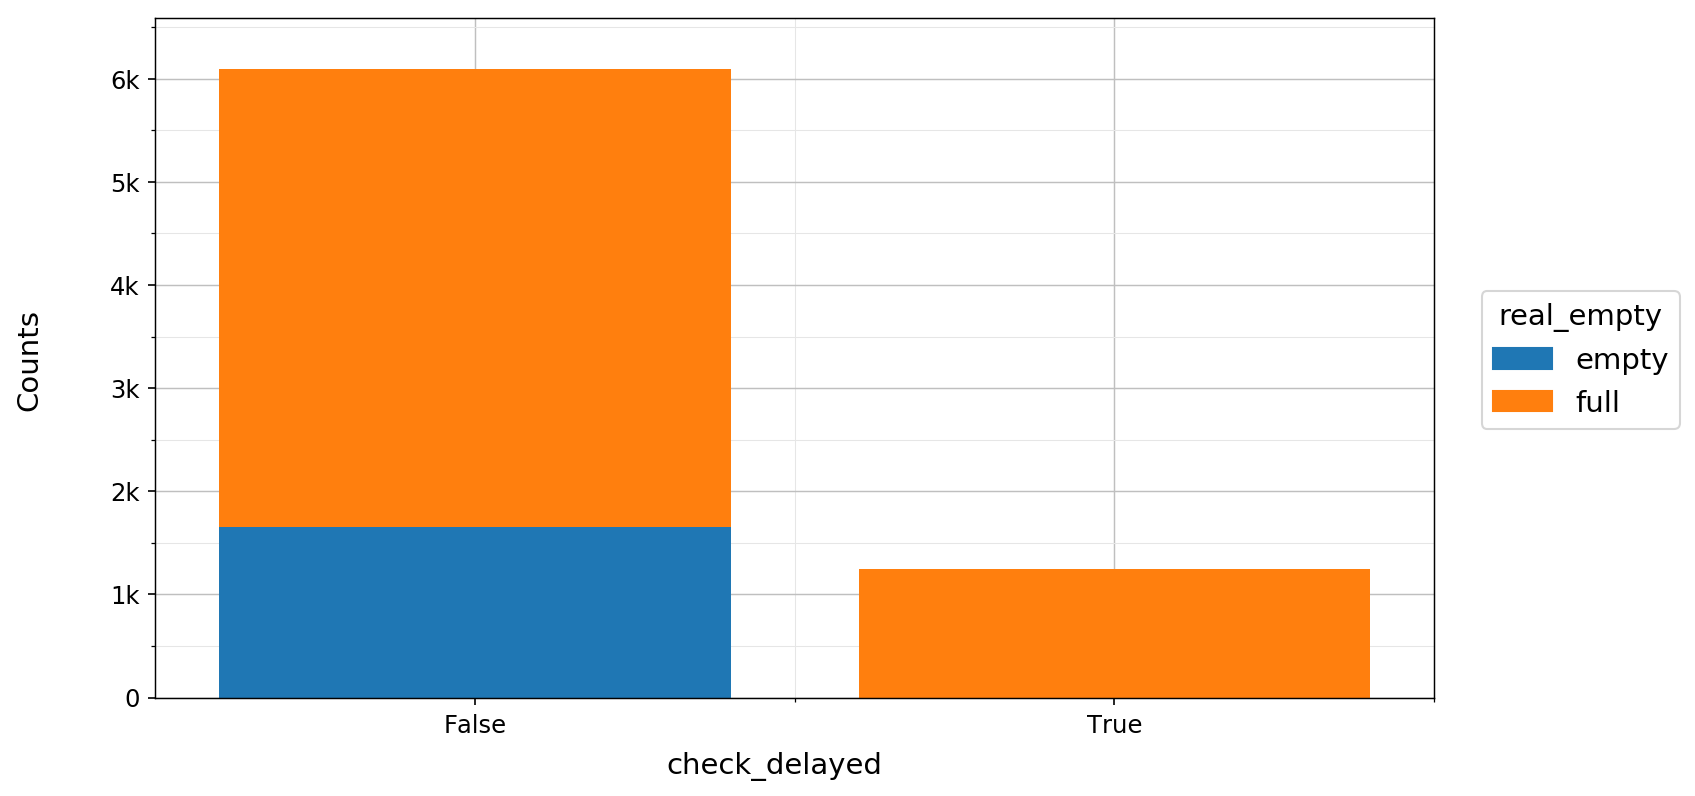

In [4]:
p=bar_plot(sorted_df, x='check_delayed', y='1',fontsize = 14,ylab = 'Counts',group='real_empty')

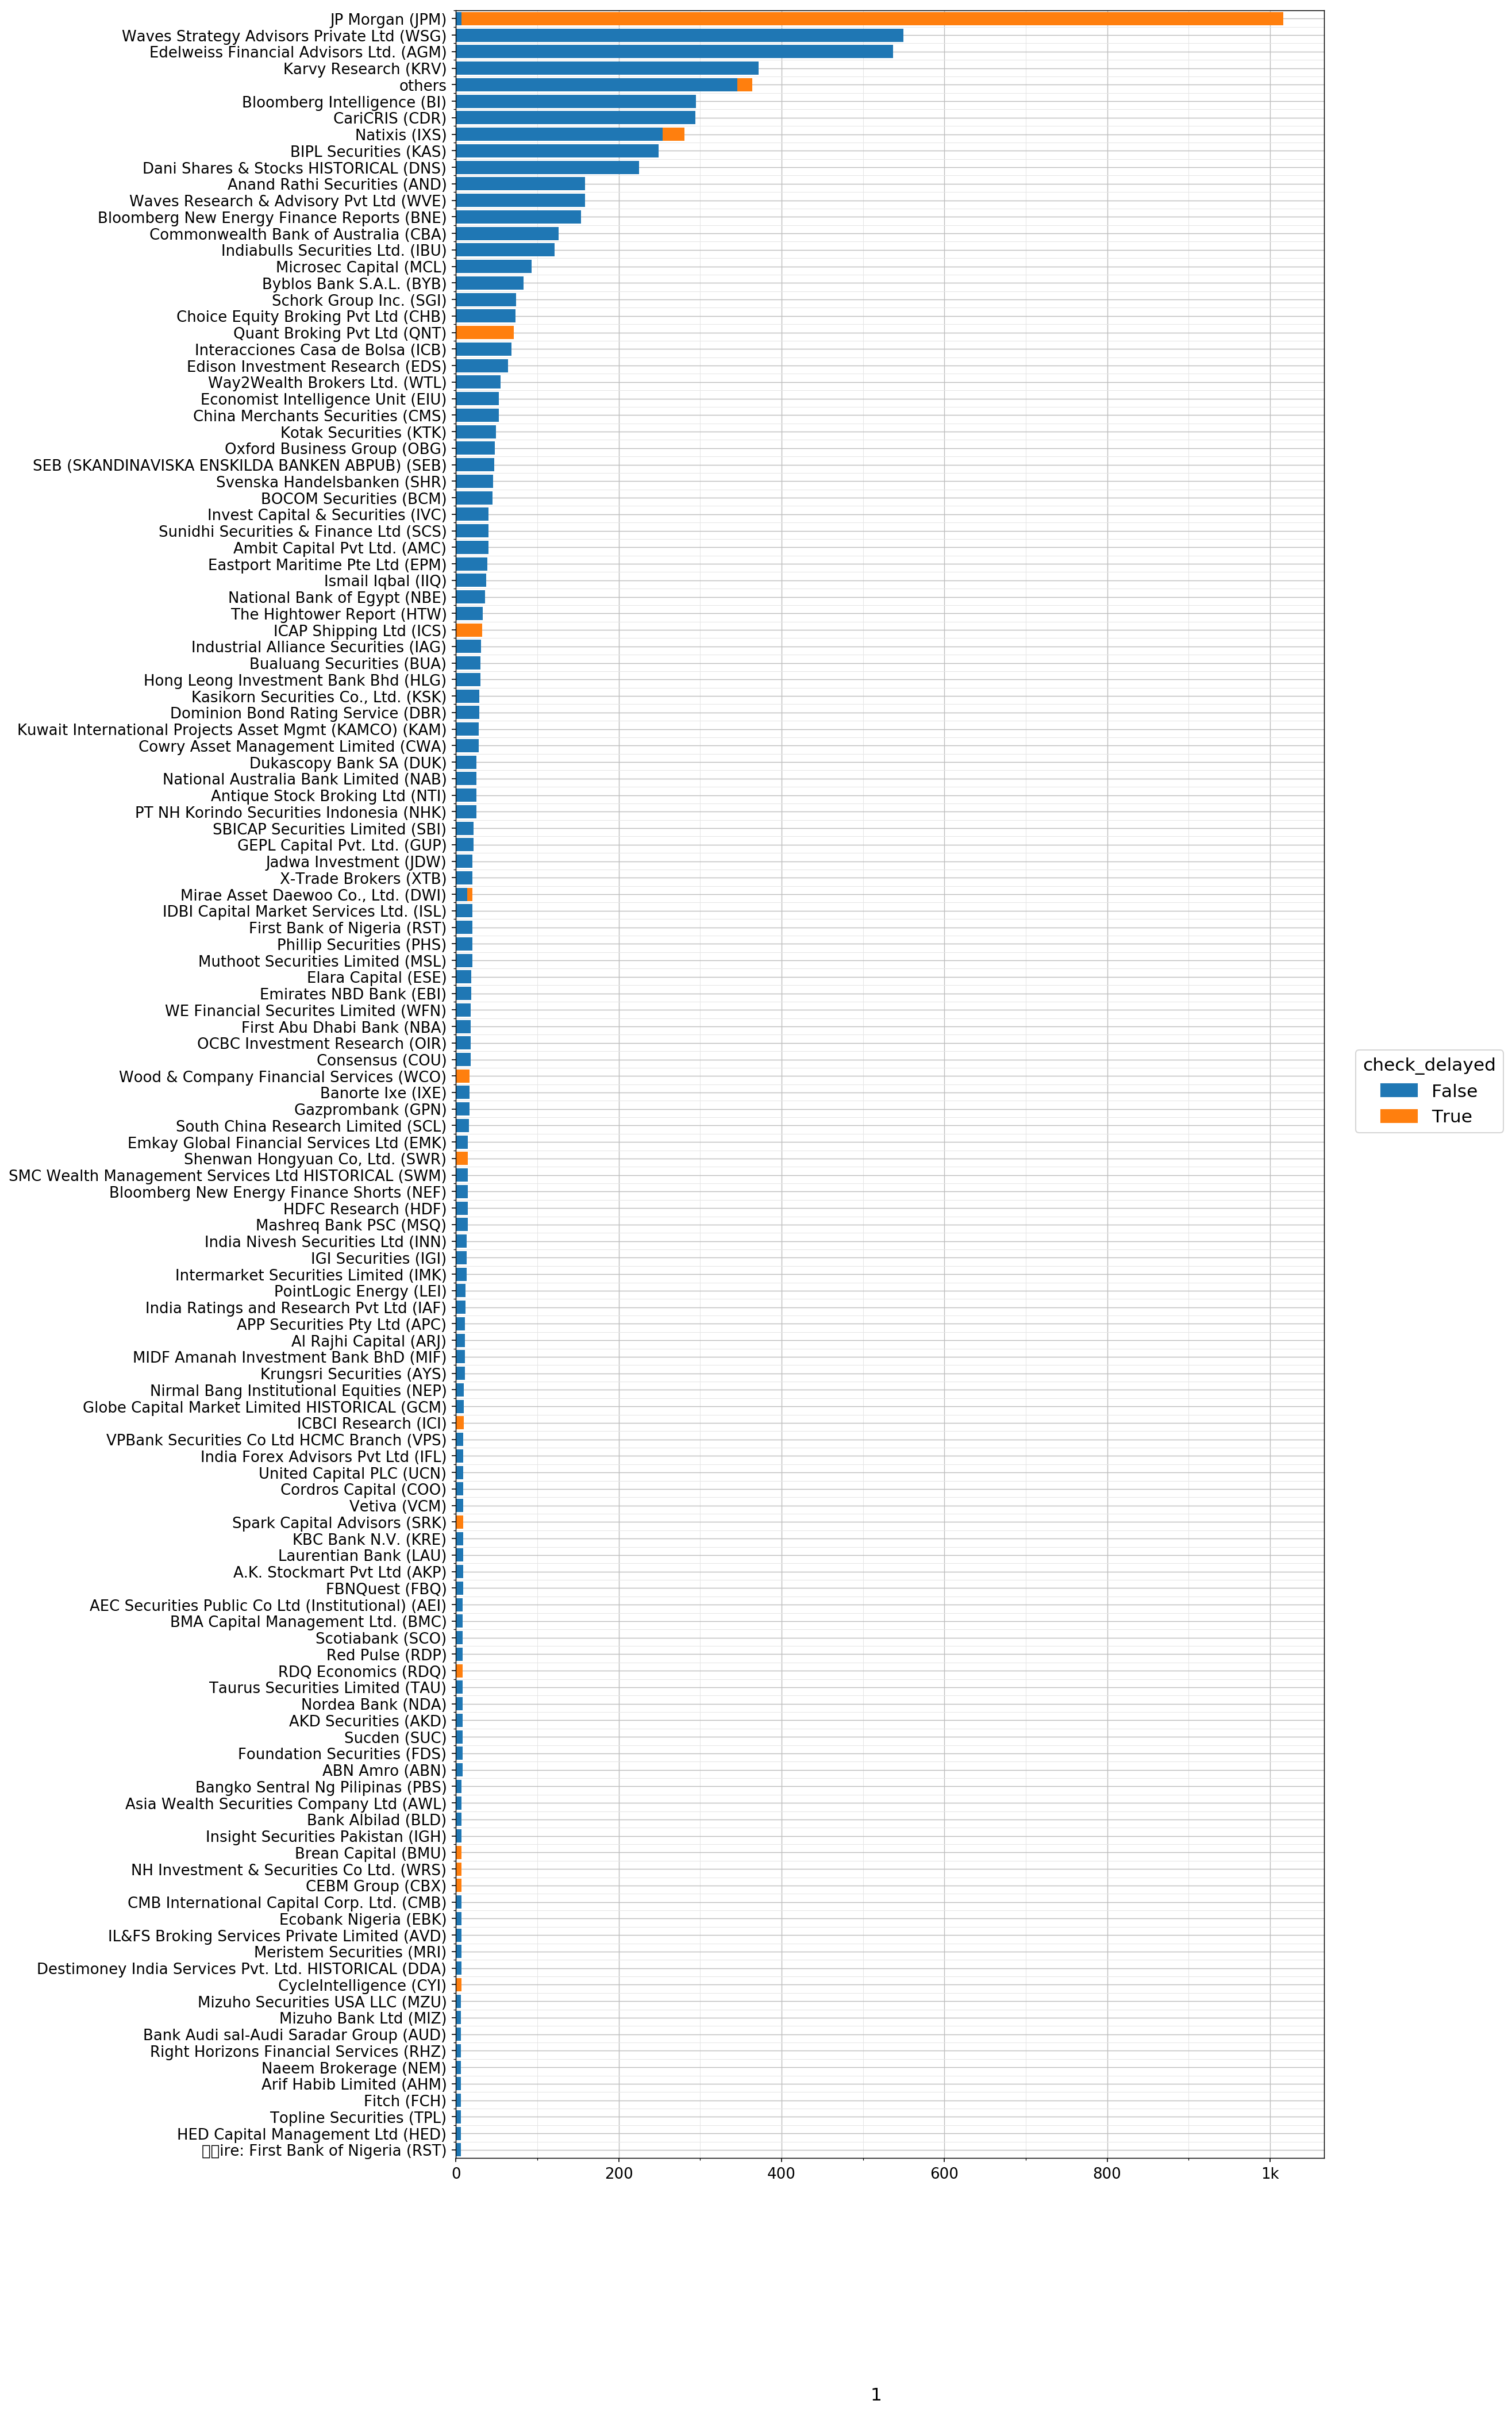

In [24]:
p=bar_plot(sorted_df, x='new_source', y='1',bars_orientation='horizontal',group='check_delayed',
           order_dict={'x':plot_source['source'].tolist()},figsize=(13, 33),fontsize=15, xlab='')

# save sorted_df

In [20]:
# sorted_df.head()

In [37]:
sorted_df.to_pickle('sorted_all_reports.pkl')